#### Imports and model creation

In [3]:
import numpy as np
import pandas as pd
import math
import xgboost as xgb
import matplotlib.pyplot as plt 
from xgboost import plot_importance
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, plot_confusion_matrix, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import compute_sample_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
import collections

In [4]:
train = pd.read_csv('train.csv').drop(columns=['Unnamed: 0'])
test = pd.read_csv('test_nolabels.csv').drop(columns=['S.No'])
X = train.drop(columns='LABELS')
y = train.loc[:,['LABELS']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=1, stratify=y)

In [5]:
train.LABELS.value_counts()

1.0    41217
0.0    20783
Name: LABELS, dtype: int64

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test = scaler.transform(test)

In [7]:
model = RandomForestClassifier(n_estimators=800, n_jobs=-1, random_state=42, class_weight={0.0: 1.7, 1.0: 1}, criterion='entropy', max_depth=20, max_features='auto')

In [8]:
model.fit(X_train_norm,y_train)

<ipython-input-8-47af2adddb7c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_norm,y_train)


RandomForestClassifier(class_weight={0.0: 1.7, 1.0: 1}, criterion='entropy',
                       max_depth=20, n_estimators=800, n_jobs=-1,
                       random_state=42)

In [9]:
val_preds = model.predict(X_val_norm)
accuracy = accuracy_score(y_val,val_preds)
print('Accuracy: {}%'.format(np.around(accuracy*100, 2)))

Accuracy: 84.6%


In [10]:
print(f1_score(y_val, val_preds, average="binary"))

0.8870357227348001


#### Classification Report

In [11]:
print(classification_report(y_val,val_preds))

              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76      4157
         1.0       0.87      0.91      0.89      8243

    accuracy                           0.85     12400
   macro avg       0.83      0.81      0.82     12400
weighted avg       0.84      0.85      0.84     12400



#### Confusion Matrix

S:\Software\Installation\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


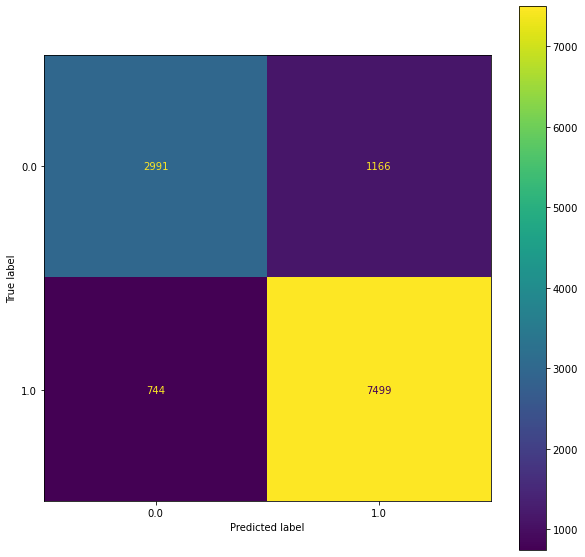

In [12]:
fig,ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(model,X_val_norm,y_val, ax=ax)
plt.show()